----------START----------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

Read the data and insert the column names to the data

In [2]:
column_names  = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
                            "sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]

training_data = pd.read_csv("F:/Subjects/Spring 2020/Pattern/Project/Project 3/wine_quality.csv", names = column_names)
training_data.describe()

,volatile acidity,citric acid,residual sugar,chlorides,sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4900.000000
mean,0.278199,0.354468,6.389196,0.045751,35.298715,138.306162,0.993621,3.186982,0.489618,10.510178,5.877755
std,0.100845,1.428792,5.072222,0.021861,17.020541,42.577100,0.020300,0.164122,0.114536,1.248521,0.892437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,1.100000,100.000000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,11.000000


Removing the duplicates from the data

In [3]:
training_data = training_data.drop_duplicates()

Remove the columns with null values

In [4]:
training_data = training_data.dropna(axis = 0, how = 'any')

training_data = training_data.drop(training_data[training_data.quality == 0].index |
                                         training_data[training_data.quality == 11].index)
training_data.describe()

,volatile acidity,citric acid,residual sugar,chlorides,sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Group by - Quality attribute

In [5]:
training_data.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3.0,20,20,20,20,20,20,20,20,20,20,20
4.0,153,153,153,153,153,153,153,153,153,153,153
5.0,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175
6.0,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788
7.0,689,689,689,689,689,689,689,689,689,689,689
8.0,131,131,131,131,131,131,131,131,131,131,131
9.0,5,5,5,5,5,5,5,5,5,5,5


Selecting values row-wise in the data

In [6]:
row_values = training_data.iloc[:, 0:11].values

Scaling the data

In [7]:
mm_scaler = preprocessing.MinMaxScaler()
X = mm_scaler.fit_transform(row_values)

# X = preprocessing.scale(row_values)

Y = training_data['quality']

a) Calculating the testing and training data using Scikit test-train function b) 20% data is testing data and 80% is training data c) ‘stratify’ to Y makes our training split represent the proportion of each value in the Y variable (Y - 'quality' category)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[0.21153846 0.17647059 0.09036145 ... 0.32727273 0.27906977 0.12903226]
 [0.30769231 0.21568627 0.1626506  ... 0.34545455 0.34883721 0.33870968]
 [0.26923077 0.1372549  0.21686747 ... 0.43636364 0.29069767 0.61290323]
 ...
 [0.25       0.33333333 0.44578313 ... 0.36363636 0.41860465 0.16129032]
 [0.375      0.26470588 0.27710843 ... 0.12727273 0.29069767 0.16129032]
 [0.27884615 0.15686275 0.15662651 ... 0.63636364 0.23255814 0.27419355]]
[[0.30769231 0.06862745 0.1746988  ... 0.39090909 0.1744186  0.27419355]
 [0.29807692 0.19607843 0.1626506  ... 0.63636364 0.31395349 0.4516129 ]
 [0.41346154 0.11764706 0.1686747  ... 0.18181818 0.1627907  0.5       ]
 ...
 [0.17307692 0.15196078 0.1746988  ... 0.56363636 0.3255814  0.48387097]
 [0.18269231 0.12745098 0.22289157 ... 0.51818182 0.46511628 0.41935484]
 [0.20192308 0.23529412 0.12048193 ... 0.47272727 0.22093023 0.37096774]]
751     5.0
4079    5.0
3586    6.0
2616    6.0
1853    6.0
       ... 
1667    6.0
987     7.0
2640    6.0
4086

Input the value from the user

In [9]:
k = int(input("Enter the value of k: "))
print("k : ", k)

T = int(input("Enter the value of T (to split the data into T groups): "))
print("T : ", T)

range1 = int(input("Enter the value of range 1: "))
print("Range 1 : ", range1)

range2 = int(input("Enter the value of range 2: "))
print("Range 2 : ", range2)

Enter the value of k: 4
k :  4
Enter the value of T (to split the data into T groups): 5
T :  5
Enter the value of range 1: 1
Range 1 :  1
Enter the value of range 2: 25
Range 2 :  25


Calculating the k-nearest classifier using the input value k

In [10]:
knn_result = KNeighborsClassifier(n_neighbors = k)

Training the Model : To train our model we will use fit function and pass the training data as parameter

In [11]:
knn_result.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

After training the model, use predict function to make prediction on testing data

In [12]:
# print("Accuracy:", knn_result.score(X_test, Y_test) * 100)
Y_predict = knn_result.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_predict) * 100)

Accuracy: 50.69356872635561


Cross validation : For cross-validation, we are using the cross_val_score function. In this function we pass the knn_cross_validation knn result which we have computed earlier, scaled data, the dataset of the quality column (i.e. the categories of the quality) and the set of folds T.

Since we have displayed two different results for different scaled data, this the score of each fold varies a little and in turn the mean of those fold data changes.

In [13]:
knn_result_cross_validation = KNeighborsClassifier(n_neighbors = k)
cross_fold_result = cross_val_score(knn_result_cross_validation, X, Y, cv = T)

Printing score of each group and also computing their mean

In [14]:
print("Score :", cross_fold_result)
print("Mean :", cross_fold_result.mean() * 100)

Score : [0.4861461  0.51450189 0.44262295 0.51453856 0.52658228]
Mean : 49.68783550711975


Optimizing our model -- Start --

In [15]:
knn_range = list(range(range1, range2))
p_grid = dict(n_neighbors = knn_range)

Calculate the K nearest classifier using the predefined function

In [16]:
knn_result_optimized_classifier = KNeighborsClassifier()

Using GridSearchCV, we optimize our model

In [17]:
gridSearch_knn_result = GridSearchCV(knn_result_optimized_classifier, param_grid = p_grid, cv = 5, scoring = 'accuracy')
gridSearch_knn_result.fit(X, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Checking and printing the best k neighbor and the best score obtained by that particular K

In [18]:
print("Best K : ", gridSearch_knn_result.best_params_)
print("Best Score : ", (gridSearch_knn_result.best_score_) * 100)

Best K :  {'n_neighbors': 24}
Best Score :  53.2441302701338


Optimizing our model -- End --

Plotting the Graph for the k values on x-axis and the error on y-axis

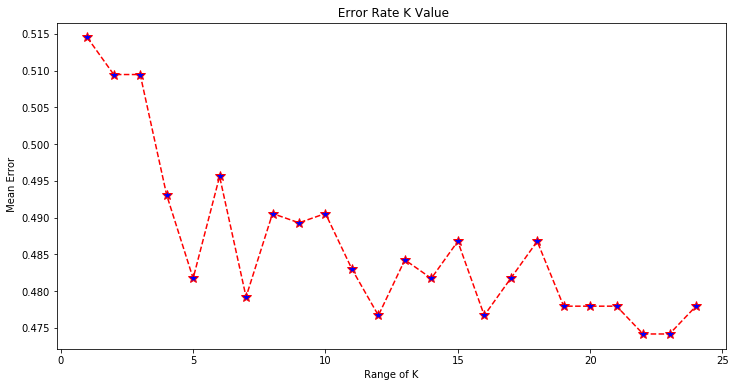

In [19]:
error = []
for i in range(range1, range2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(range1, range2), error, color = 'red', linestyle = 'dashed', marker = '*', markerfacecolor = 'blue', markersize = 10)
plt.title(' Error Rate K Value')
plt.xlabel(' Range of K ')
plt.ylabel(' Mean Error')
plt.show()

----------END----------